In [1]:
# John Duncan
# CS 391L: Machine Learning, Fall 2020
# Assignment 2: Independent Component Analysis

######################################################################################### Import packages
import scipy.io as spio # An Input/Output module for obtaining MATLAB data within Python 
from scipy.io.wavfile import write # For saving .wav files
import numpy as np # Matrix manipulation, data processing
import matplotlib.pyplot as plt # Used to plot data

######################################################################################### Define functions
# The Natural Gradient function, derived in section II of report
def gradient_descent(X, W, alpha, num_calcs):
    
    # INPUTS
    # X = mxt matrix of mixed signals
    # W = nxm unmixing matrix
    # alpha = step size; floating point between 0-1
    # num_calcs = number of calculations to perform
    
    # OUTPUTS
    # W = the unmixing matrix
    # loop_count 
    
    loop_count = 0
        
    while(num_calcs > loop_count): #Continue iterating until % change is below specified tolerance
        
        # Compute current estimate Y, based on weights W and mixed signal matrix, X
        Y = np.matmul(W,X)
        
        # Compute the log-likelihood g of the current estimate, Y
        g = 1/(1+np.exp(-Y))
        g_prime = g*(1-g)
        
        # Compute change in weights, delta_W, based on current likelihood and learning rate/step size alpha
        # NOTE: must divide by t to generate the expected value, as derived in report
        delta_W = np.identity(n) + np.matmul(1-2*g, Y.transpose())/t
        
        # Compute new Weights, W
        W = W + alpha*delta_W
        
        # Compute percentage change of unmixing matrix, W. If < tolerance, exit the loop.
        pct_change = (np.linalg.norm(delta_W)/np.linalg.norm(W))
        
        # Increment loop count.
        loop_count+=1
        
    return W

# Function to plot original and mixed signals
def plot_originals(U,X):
    # Create Plot Object
    fig, axes = plt.subplots(5, 2)
    
    # Source signals
    axes[0,0].plot(U[0,:],'r')
    axes[0,0].set_title('Source Signals')
    axes[1,0].plot(U[1,:],'b')
    axes[2,0].plot(U[2,:],'g')
    axes[3,0].plot(U[3,:],'y')
    axes[4,0].plot(U[4,:],'m')
    
    # Mixed signals
    axes[0,1].plot(X[0,:])
    axes[0,1].set_title('Mixed Signals')
    axes[1,1].plot(X[1,:])
    axes[2,1].plot(X[2,:])
    axes[3,1].plot(X[3,:])
    axes[4,1].plot(X[4,:])
    
    # Save and show image
    fig.savefig("images/originals.PNG")
    plt.show()

# Function to plot recovered signals
def plot_recovered(Y,n,indices):
    # Create Plot Object
    fig, axes = plt.subplots(5, 1)
    
    # Set title of plot
    axes[0].set_title('Recovered Signals ('+ str(n) +' iterations)')
    
    # Source signals
    axes[0].plot(Y[indices[0],:],'r')
    axes[1].plot(Y[indices[1],:],'b')
    axes[2].plot(Y[indices[2],:],'g')
    axes[3].plot(Y[indices[3],:],'y')
    axes[4].plot(Y[indices[4],:],'m')
    
    # Save and show image
    fig.savefig("images/recovered_" + str(n) + "_iterations.PNG")
    plt.show()

########################################################################## Initialization
    
# Import data
data = spio.loadmat('data/sounds.mat');
U = data['sounds']; # Unmixed signals
global n,m,t # dimensions
(n,t) = U.shape # get dimensions of U

# Generate .wav files of original signals
for ii in range(n):
    exec('write(\"sounds/U_'+str(ii)+'.wav\",11025,U[' + str(ii) +',:])')

# Generate a random, initial guess for weighting matrix A with normalized columns
m=5
A=np.random.rand(m,n)
A = A/np.linalg.norm(A,axis=1)

# Mix the signals
X = np.matmul(A,U)

# Generate plots and images of original & mixed signals
plot_originals(U,X)

# Give a random, initial guess for unmixing matrix W. Normalize each row
W = np.random.rand(n,m)

############################################################ Natural Gradient Computations

# Run the natural gradient function for various numbers of computations
alpha=.01 # Step size
for points in [1000,3000,5000,10000,30000,50000,100000]:
    exec('W_'+ str(points) + ' = gradient_descent(X, W, alpha,'+str(points) +')')

############################################################################ Processing of Results Data

# Define the indices of the recovered signals that correspond to the original signals 
# NOTE: this was done after observing correlation matrix
rec_indices_1000= [1,4,0,2,3]
rec_indices_3000= [4,1,0,2,3]
rec_indices_5000= [4,1,0,2,3]
rec_indices_10000= [4,3,0,2,1]
rec_indices_30000= [4,3,0,2,1]
rec_indices_50000= [4,3,0,2,1]
rec_indices_100000= [4,3,0,2,1]

# Reconstruct data for each unmixing matrix
Y_1000=np.matmul(W_1000,X)
Y_3000=np.matmul(W_3000,X)
Y_5000=np.matmul(W_5000,X)
Y_10000=np.matmul(W_10000,X)
Y_30000=np.matmul(W_30000,X)
Y_50000=np.matmul(W_50000,X)
Y_100000=np.matmul(W_100000,X)

# Scale the reconstructed signals such that max of each signal = 1 (i.e. divide them by max value in each row)
Y_1000_scaled=Y_1000/(np.max(Y_1000,axis=1)[np.newaxis]).transpose()
Y_3000_scaled=Y_3000/(np.max(Y_1000,axis=1)[np.newaxis]).transpose()
Y_5000_scaled=Y_5000/(np.max(Y_1000,axis=1)[np.newaxis]).transpose()
Y_10000_scaled=Y_10000/(np.max(Y_1000,axis=1)[np.newaxis]).transpose()
Y_30000_scaled=Y_30000/(np.max(Y_1000,axis=1)[np.newaxis]).transpose()
Y_50000_scaled=Y_50000/(np.max(Y_1000,axis=1)[np.newaxis]).transpose()
Y_100000_scaled=Y_100000/(np.max(Y_1000,axis=1)[np.newaxis]).transpose()


########################################################################## Generate output plots, data, files

# Plot recovered signals
plot_recovered(Y_1000_scaled,1000,rec_indices_1000)
plot_recovered(Y_3000_scaled,3000,rec_indices_3000)
plot_recovered(Y_5000_scaled,5000,rec_indices_5000)
plot_recovered(Y_10000_scaled,10000,rec_indices_10000)
plot_recovered(Y_30000_scaled,30000,rec_indices_30000)
plot_recovered(Y_50000_scaled,50000,rec_indices_50000)
plot_recovered(Y_100000_scaled,100000,rec_indices_100000)

# Generate .wav files of recovered signals (100000 calculations only)
for ii in range(n):
    exec('write(\"sounds/Y_'+str(ii)+'_100000.wav\",11025,Y_100000[' + str(ii) +',:])')

# Compute correlation of recovered signals
correlation_dict = {} # Initialize empty dictionary for storage
for num_calcs in [1000,3000,5000,10000,30000,50000,100000]: # Create key for each number of calculations
    
    exec('correlation_dict[\''+str(num_calcs)+'\']=np.zeros((n,n))') # Create empty array
    exec('indices = rec_indices_'+str(num_calcs)) 

    # Compute correlations between each source signal and each recovered signal. Store in array.
    for ii in range(n):
        for jj in range(n):
            exec('correlation=np.correlate(U[ii,:],Y_' + str(num_calcs) + '_scaled[indices[jj],:])')
            exec('correlation_dict[\''+str(num_calcs)+'\'][ii][jj]=correlation')

# Examine correlation matrix for n=10000 calculations
print(correlation_dict['10000'])

# Plot correlation of recovered signals
num_calcs = [1000,3000,5000,10000,30000,50000,100000]

# Initialize arrays for maximum signal correlations
U0_max_corr = []
U1_max_corr = []
U2_max_corr = []
U3_max_corr = []
U4_max_corr = []

for ii,num in enumerate(num_calcs):
    
    # Get maximum correlation values for each signal, for this number of calculations
    exec('max_corr = np.max(correlation_dict[\''+str(num)+'\'],axis=1)')
    U0_max_corr.append(max_corr[0])
    U1_max_corr.append(max_corr[1])
    U2_max_corr.append(max_corr[2])
    U3_max_corr.append(max_corr[3])
    U4_max_corr.append(max_corr[4])

# Plot maximum correlation vs numer of calculations for each source signal
plt.plot(num_calcs, U0_max_corr, label='Homer')
plt.plot(num_calcs, U1_max_corr, label='Vacuum')
plt.plot(num_calcs, U2_max_corr, label='Applause')
plt.plot(num_calcs, U3_max_corr, label='Laughter')
plt.plot(num_calcs, U4_max_corr, label='Crackling')

plt.xlabel('Number of calculations')
plt.ylabel('Maximum correlation with unmixed signal')

plt.title("Correlation of Source and Recovered Signals")
plt.legend()
plt.show()



<Figure size 640x480 with 10 Axes>

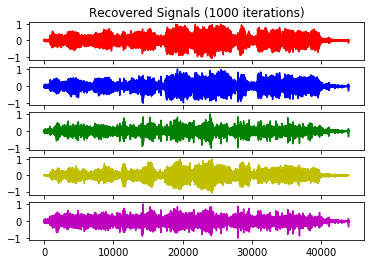

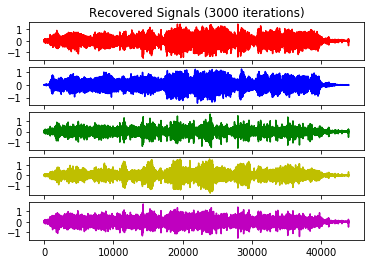

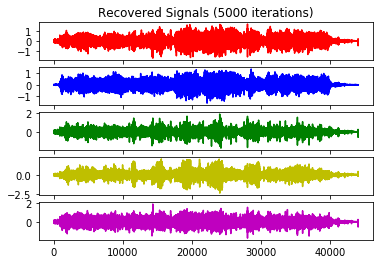

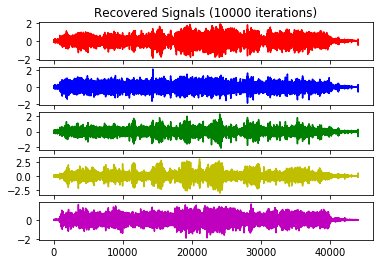

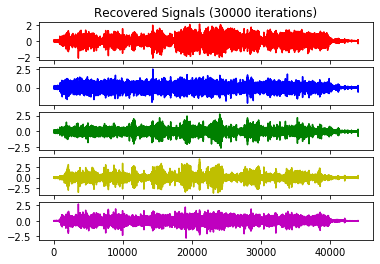

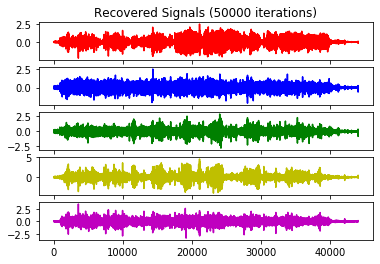

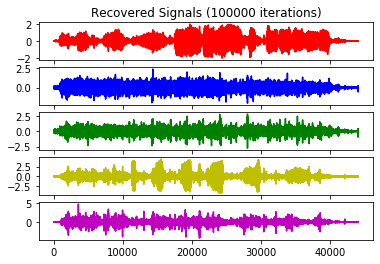

[[2307.87873844 -924.4191295     8.91674597 1375.01300836 2081.03213962]
 [-505.83029728 1092.51338906 -573.56157472  113.73417621 1093.35900742]
 [ 627.24430786  717.74294662  741.93175753 -688.80538776   -9.67642032]
 [-654.29318481  245.65084696  695.08841846 1350.81998727  213.55936137]
 [ 204.96150469  148.49737369  152.04446321  507.7385959  -240.3004007 ]]


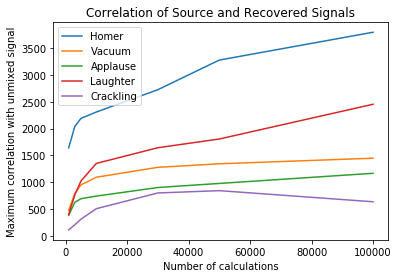

In [118]:
print(correlation_dict['10000'])

[[2307.87873844 -924.4191295     8.91674597 1375.01300836 2081.03213962]
 [-505.83029728 1092.51338906 -573.56157472  113.73417621 1093.35900742]
 [ 627.24430786  717.74294662  741.93175753 -688.80538776   -9.67642032]
 [-654.29318481  245.65084696  695.08841846 1350.81998727  213.55936137]
 [ 204.96150469  148.49737369  152.04446321  507.7385959  -240.3004007 ]]


[[ 275.94251033 1640.56757492 1222.3496034  -194.2871335  1529.27265831]
 [  50.32126693  478.30131439  286.99097033  416.83237399  -24.88063627]
 [ 383.86352033  183.26858928  -46.16672933  381.31741623  334.93276711]
 [ 256.64256933  206.11914601  400.46900528  288.1591365   -78.38840442]
 [  94.3041185    28.96021098  112.35046117   78.95799639   79.92773254]]
0 1 2 3 4

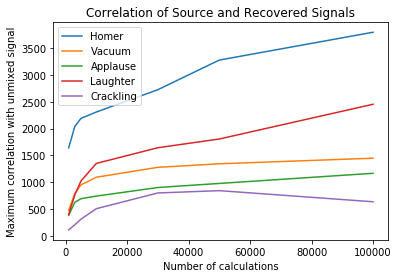

In [115]:
# Plot correlation of recovered signals
num_calcs = [1000,3000,5000,10000,30000,50000,100000]

# Initialize arrays for maximum signal correlations
U0_max_corr = []
U1_max_corr = []
U2_max_corr = []
U3_max_corr = []
U4_max_corr = []

for ii,num in enumerate(num_calcs):
    
    # Get maximum correlation values for each signal, for this number of calculations
    exec('max_corr = np.max(correlation_dict[\''+str(num)+'\'],axis=1)')
    U0_max_corr.append(max_corr[0])
    U1_max_corr.append(max_corr[1])
    U2_max_corr.append(max_corr[2])
    U3_max_corr.append(max_corr[3])
    U4_max_corr.append(max_corr[4])

    


#plot ([1000,3000,5000,10000,30000,50000,100000], correlation)
plt.plot(num_calcs, U0_max_corr, label='Homer')
plt.plot(num_calcs, U1_max_corr, label='Vacuum')
plt.plot(num_calcs, U2_max_corr, label='Applause')
plt.plot(num_calcs, U3_max_corr, label='Laughter')
plt.plot(num_calcs, U4_max_corr, label='Crackling')

plt.xlabel('Number of calculations')
plt.ylabel('Maximum correlation with unmixed signal')

plt.title("Correlation of Source and Recovered Signals")

plt.legend()

plt.show()





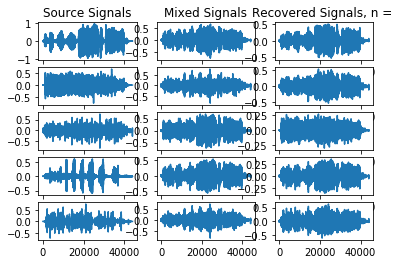

In [123]:
n = 30000
W = W_50000
rec_indices = [2, 0, 1, 3, 4]

# Normalize W matrix
W = W/np.linalg.norm(W,axis=1)

# Unmix data
Y = np.matmul(W,X)

# Create Plot Object
fig, axes = plt.subplots(5, 3)

# Source signals
axes[0,0].plot(U[0,:])
axes[0,0].set_title('Source Signals')
axes[1,0].plot(U[1,:])
axes[2,0].plot(U[2,:])
axes[3,0].plot(U[3,:])
axes[4,0].plot(U[4,:])

# Mixed signals
axes[0,1].plot(X[0,:])
axes[0,1].set_title('Mixed Signals')
axes[1,1].plot(X[1,:])
axes[2,1].plot(X[2,:])
axes[3,1].plot(X[3,:])
axes[4,1].plot(X[4,:])

# Unmixed Signals
axes[0,2].plot(Y[0,:])
axes[0,2].set_title('Recovered Signals, n = ' )
axes[1,2].plot(Y[1,:])
axes[2,2].plot(Y[2,:])
axes[3,2].plot(Y[3,:])
axes[4,2].plot(Y[4,:])

fig.savefig("images/n_" + str(n) + ".PNG")
plt.show()

In [6]:
alpha=.025

loop_count=0
loop=50000

while(loop_count < loop): #Continue iterating until % change is below specified tolerance
        
    # Compute current estimate Y, based on weights W and mixed signal matrix, X
    Y = np.matmul(W,X)
    
    # Compute the likelihood Z of the current estimate, Y
    g = 1/(1+np.exp(-Y))
    g_prime = g*(1-g)
    #print(l)
        
    # Compute change in weights, delta_W, based on current likelihood and learning rate/step size alpha
    delta_W = np.identity(n) + np.matmul(1-2*g, Y.transpose())/t
    
    #delta_W = np.matmul((np.identity(n) + np.matmul((1-2*g),Y.transpose())/t,W))
        
    # Compute new Weights, W
    W = W + alpha*delta_W
    #print(W)
        
    # Compute percentage change. If < tolerance, exit while loop and return W.
    pct_change = (np.linalg.norm(delta_W)/np.linalg.norm(W))
    
    #print(pct_change)
    loop_count+=1

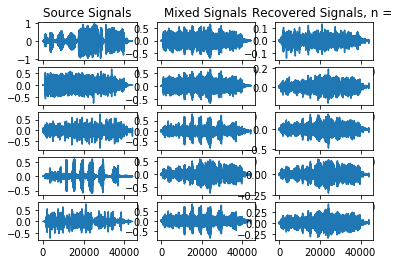

In [11]:

W = W_old

# Unmix data
Y = np.matmul(W,X)

# Create Plot Object
fig, axes = plt.subplots(5, 3)

# Source signals
axes[0,0].plot(U[0,:])
axes[0,0].set_title('Source Signals')
axes[1,0].plot(U[1,:])
axes[2,0].plot(U[2,:])
axes[3,0].plot(U[3,:])
axes[4,0].plot(U[4,:])

# Mixed signals
axes[0,1].plot(X[0,:])
axes[0,1].set_title('Mixed Signals')
axes[1,1].plot(X[1,:])
axes[2,1].plot(X[2,:])
axes[3,1].plot(X[3,:])
axes[4,1].plot(X[4,:])

# Unmixed Signals
axes[0,2].plot(Y[0,:])
axes[0,2].set_title('Recovered Signals, n = ' )
axes[1,2].plot(Y[1,:])
axes[2,2].plot(Y[2,:])
axes[3,2].plot(Y[3,:])
axes[4,2].plot(Y[4,:])

plt.show()